# `K Nearest Neighbors --------------------------------------`

In [41]:
import pandas as pd
import seaborn as sns

In [42]:
data = pd.read_csv("KNNData.csv")

In [43]:
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### all are numeric columns

In [44]:
# sns.pairplot(data,hue="TARGET CLASS")

In [45]:
from sklearn.model_selection import train_test_split
X = data.drop("TARGET CLASS",axis=1)
y = data["TARGET CLASS"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

### `min max normalisation`

In [46]:
from sklearn.preprocessing import MinMaxScaler

min_max_sc = MinMaxScaler()
min_max_sc.fit(X_train)
X_train = min_max_sc.transform(X_train)
X_test = min_max_sc.transform(X_test)

In [47]:
X_train

array([[0.39081679, 0.19865222, 0.31981671, ..., 0.34342159, 0.59857591,
        0.05192919],
       [0.55647911, 0.35940128, 0.6911497 , ..., 0.74793671, 0.34954176,
        0.97157292],
       [0.36585525, 0.71834978, 0.35874416, ..., 0.60618483, 0.71628476,
        0.39445792],
       ...,
       [0.29615687, 0.72919333, 0.34781339, ..., 0.78136813, 0.56213633,
        0.74754356],
       [0.57793129, 0.28268356, 0.34445226, ..., 0.50138256, 0.7333152 ,
        0.32608471],
       [0.59988116, 0.4953968 , 0.40337635, ..., 0.46295252, 0.67593727,
        0.35850644]])

### `KNN ------------------------------------------------------------------------`

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

knn = KNeighborsClassifier(n_neighbors=3,p=2)
knn.fit(X_train,y_train)
y_pred  = knn.predict(X_test)
print(f"Accuracy score is {accuracy_score(y_test,y_pred)}")
print(f"Precision score is {precision_score(y_test,y_pred)}")
print(f"Recall score is {recall_score(y_test,y_pred)}")
print(f"misclassification error { sum((y_pred != y_test))/ X_test.shape[0]}")

Accuracy score is 0.9233333333333333
Precision score is 0.9066666666666666
Recall score is 0.9379310344827586
misclassification error 0.07666666666666666


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

knn = KNeighborsClassifier(n_neighbors=5,p=2)
knn.fit(X_train,y_train)
y_pred  = knn.predict(X_test)
print(f"Accuracy score is {accuracy_score(y_test,y_pred)}")
print(f"Precision score is {precision_score(y_test,y_pred)}")
print(f"Recall score is {recall_score(y_test,y_pred)}")
print(f"misclassification error { sum((y_pred != y_test))/ X_test.shape[0]}")

Accuracy score is 0.9433333333333334
Precision score is 0.9324324324324325
Recall score is 0.9517241379310345
misclassification error 0.056666666666666664


In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

knn = KNeighborsClassifier(n_neighbors=7,p=2)
knn.fit(X_train,y_train)
y_pred  = knn.predict(X_test)
print(f"Accuracy score is {accuracy_score(y_test,y_pred)}")
print(f"Precision score is {precision_score(y_test,y_pred)}")
print(f"Recall score is {recall_score(y_test,y_pred)}")
print(f"misclassification error { sum((y_pred != y_test))/ X_test.shape[0]}")

Accuracy score is 0.9433333333333334
Precision score is 0.9324324324324325
Recall score is 0.9517241379310345
misclassification error 0.056666666666666664


### `Same things by iteration`

In [51]:
misclassification_error = []
for i in range(3,15,2):
    print(f"Fitting KNN with k == {i}\n~~~~~~~~~~~~~~~~~~~")
    knn = KNeighborsClassifier(n_neighbors=i,p=2)
    knn.fit(X_train,y_train)
    y_pred  = knn.predict(X_test)
    print(f"Accuracy score is {accuracy_score(y_test,y_pred)}")
    print(f"Precision score is {precision_score(y_test,y_pred)}")
    print(f"Recall score is {recall_score(y_test,y_pred)}")
    miss_error = sum((y_pred != y_test))/ X_test.shape[0]
    print(f"misclassification error { miss_error}")
    print("",end="\n\n\n")
    misclassification_error.append(miss_error)

Fitting KNN with k == 3
~~~~~~~~~~~~~~~~~~~
Accuracy score is 0.9233333333333333
Precision score is 0.9066666666666666
Recall score is 0.9379310344827586
misclassification error 0.07666666666666666



Fitting KNN with k == 5
~~~~~~~~~~~~~~~~~~~
Accuracy score is 0.9433333333333334
Precision score is 0.9324324324324325
Recall score is 0.9517241379310345
misclassification error 0.056666666666666664



Fitting KNN with k == 7
~~~~~~~~~~~~~~~~~~~
Accuracy score is 0.9433333333333334
Precision score is 0.9324324324324325
Recall score is 0.9517241379310345
misclassification error 0.056666666666666664



Fitting KNN with k == 9
~~~~~~~~~~~~~~~~~~~
Accuracy score is 0.9466666666666667
Precision score is 0.9328859060402684
Recall score is 0.9586206896551724
misclassification error 0.05333333333333334



Fitting KNN with k == 11
~~~~~~~~~~~~~~~~~~~
Accuracy score is 0.9533333333333334
Precision score is 0.9395973154362416
Recall score is 0.9655172413793104
misclassification error 0.0466666666666

### `plot misclassification`

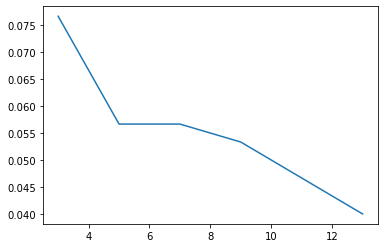

In [52]:
import matplotlib.pyplot as plt

plt.plot(list(range(3,15,2)),misclassification_error)

## `grid search for KNN`

In [53]:
parameters = {
    "n_neighbors": list(range(3,17,2)),
    "p":[1,2]
}

### `It's completely depends upon business case, that you have to find wrt precision or accuracy`

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
grid = GridSearchCV(knn,parameters,n_jobs=-1,scoring="precision")
grid.fit(X_train,y_train)


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'p': [1, 2]},
             scoring='precision')

In [55]:
grid.best_params_

{'n_neighbors': 15, 'p': 1}

## `END ---------------------------------------------------------------------`